# Data Preparation

## Data Collection

In [6]:
from datasets import load_dataset, load_from_disk


In [23]:
# # load the dataset from huggingface
# dataset = load_dataset("mtg_image_data", split="train")

# # save the dataset to disk
# dataset.save_to_disk("data/mtg-image-data")

# load the dataset from disk
dataset = load_from_disk("data/mtg-image-data")
dataset

Dataset({
    features: ['image', 'Unnamed: 0', 'text'],
    num_rows: 27000
})

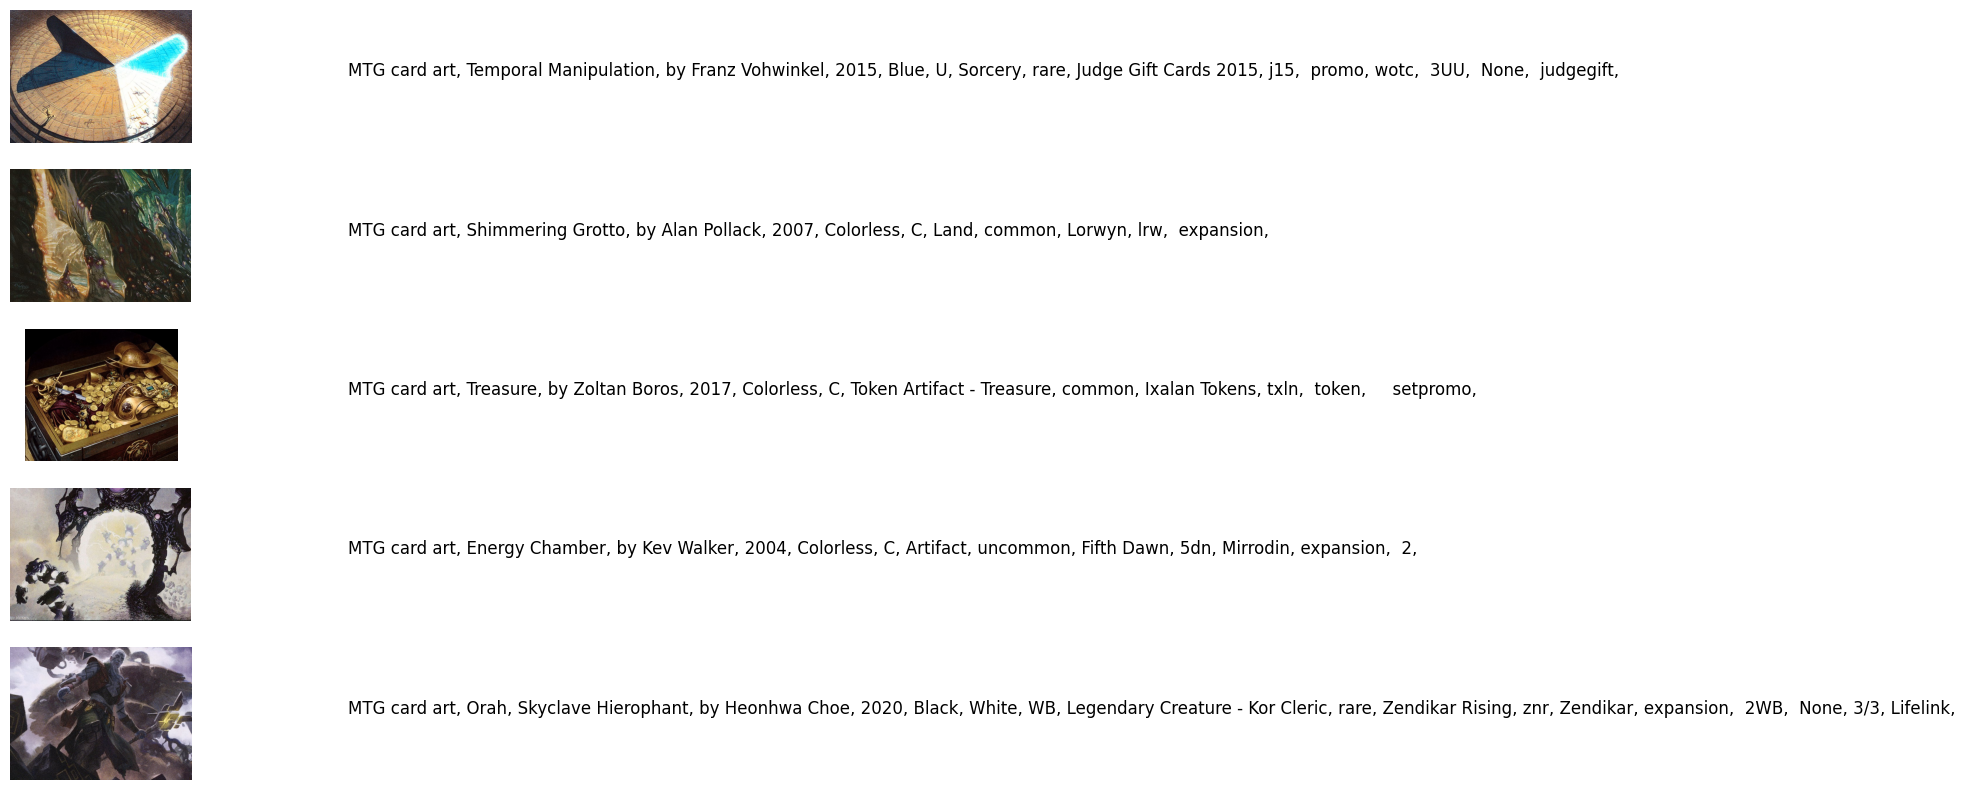

In [30]:
import matplotlib.pyplot as plt
import random

# Define a function to visualize images in the first column and their corresponding text in the second column
def visualize_images(dataset, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        idx = random.randint(0, len(dataset))
        image = dataset[idx]["image"]
        text = dataset[idx]["text"]
        plt.subplot(num_images, 2, 2 * i + 1)
        plt.imshow(image)
        plt.axis("off")
        plt.subplot(num_images, 2, 2 * i + 2)
        plt.text(0, 0.5, text, fontsize=12)
        plt.axis("off")
    plt.show()

# Visualize some random images from the dataset
visualize_images(dataset)


In [31]:
# Extract the features (U, B, W, G, R, C) from the text, searching for pattern like ', U,' and the new feature with name "mana_color"
import re
def extract_features(text):
    features = re.findall(r", (U|B|W|G|R|C),", text)
    return features

# Add the extracted features to the dataset
dataset = dataset.map(lambda x: {"mana_color": extract_features(x["text"])})
dataset

Map: 100%|██████████| 27000/27000 [00:14<00:00, 1856.35 examples/s]


Dataset({
    features: ['image', 'Unnamed: 0', 'text', 'mana_color'],
    num_rows: 27000
})

In [32]:
# check mana_color feature for missing values
dataset.filter(lambda x: len(x["mana_color"]) == 0)

Filter:  11%|█         | 3000/27000 [00:30<04:05, 97.94 examples/s] 


KeyboardInterrupt: 